<a href="https://colab.research.google.com/github/Gab2697/Surface-classification-EMG/blob/main/EMG_compare_litt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statistics

import scipy.ndimage
import scipy.signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving exported-14.zip to exported-14.zip


In [ ]:
 !unzip "/content/exported-14.zip" -d "/content/"

Archive:  /content/exported-14.zip
   creating: /content/exported-14/
  inflating: /content/__MACOSX/._exported-14  
  inflating: /content/exported-14/P14_2asphalt1.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt1.xlsx  
  inflating: /content/exported-14/P14_2asphalt10.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt10.xlsx  
  inflating: /content/exported-14/P14_2asphalt11.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt11.xlsx  
  inflating: /content/exported-14/P14_2asphalt12.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt12.xlsx  
  inflating: /content/exported-14/P14_2asphalt13.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt13.xlsx  
  inflating: /content/exported-14/P14_2asphalt14.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt14.xlsx  
  inflating: /content/exported-14/P14_2asphalt15.xlsx  
  inflating: /content/__MACOSX/exported-14/._P14_2asphalt15.xlsx  
  inflating: /content/ex

In [ ]:
#remove files starting with ._
import os
import glob

files = glob.glob('/content/exported-14/._*')
for f in files:
    os.remove(f)

In [ ]:
T1_14_asphalt=pd.read_excel('/content/exported-14/P14_2asphalt1.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T2_14_asphalt=pd.read_excel('/content/exported-14/P14_2asphalt5.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T3_14_asphalt=pd.read_excel('/content/exported-14/P14_3asphalt19.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T4_14_asphalt=pd.read_excel('/content/exported-14/P14_asphalt26.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')

T1_14_grass=pd.read_excel('/content/exported-14/P14_2grass5.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T2_14_grass=pd.read_excel('/content/exported-14/P14_3grass13.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T3_14_grass=pd.read_excel('/content/exported-14/P14_3grass5.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')
T4_14_grass=pd.read_excel('/content/exported-14/P14_grass16.xlsx',sheet_name='Sheet1',  usecols = 'E,F,H,J,N,P,R,V,X,Z')

In [ ]:
def cut_trials(Trial,muscle):
  Window=148*3
  t=(Trial.iloc[:,muscle]).to_numpy() #RF Y
  dimensions= np.max(np.nonzero(t)) #index of last non-zero value
  Middle=int(dimensions/2)
  T_cut =t[Middle-Window:Middle+Window]
  return T_cut 

In [ ]:
#Gastroc
T1_14a_GastrocAccX_cut=cut_trials(T1_14_asphalt,1)
T2_14a_GastrocAccX_cut=cut_trials(T2_14_asphalt,1)
T3_14a_GastrocAccX_cut=cut_trials(T3_14_asphalt,1)
T4_14a_GastrocAccX_cut=cut_trials(T4_14_asphalt,1)

T1_14a_GastrocAccY_cut=cut_trials(T1_14_asphalt,2)
T2_14a_GastrocAccY_cut=cut_trials(T2_14_asphalt,2)
T3_14a_GastrocAccY_cut=cut_trials(T3_14_asphalt,2)
T4_14a_GastrocAccY_cut=cut_trials(T4_14_asphalt,2)

T1_14a_GastrocAccZ_cut=cut_trials(T1_14_asphalt,3)
T2_14a_GastrocAccZ_cut=cut_trials(T2_14_asphalt,3)
T3_14a_GastrocAccZ_cut=cut_trials(T3_14_asphalt,3)
T4_14a_GastrocAccZ_cut=cut_trials(T4_14_asphalt,3)

#RF
T1_14a_RFAccX_cut=cut_trials(T1_14_asphalt,4)
T2_14a_RFAccX_cut=cut_trials(T2_14_asphalt,4)
T3_14a_RFAccX_cut=cut_trials(T3_14_asphalt,4)
T4_14a_RFAccX_cut=cut_trials(T4_14_asphalt,4)

T1_14a_RFAccY_cut=cut_trials(T1_14_asphalt,5)
T2_14a_RFAccY_cut=cut_trials(T2_14_asphalt,5)
T3_14a_RFAccY_cut=cut_trials(T3_14_asphalt,5)
T4_14a_RFAccY_cut=cut_trials(T4_14_asphalt,5)

T1_14a_RFAccZ_cut=cut_trials(T1_14_asphalt,6)
T2_14a_RFAccZ_cut=cut_trials(T2_14_asphalt,6)
T3_14a_RFAccZ_cut=cut_trials(T3_14_asphalt,6)
T4_14a_RFAccZ_cut=cut_trials(T4_14_asphalt,6)

#BF
T1_14a_BFAccX_cut=cut_trials(T1_14_asphalt,7)
T2_14a_BFAccX_cut=cut_trials(T2_14_asphalt,7)
T3_14a_BFAccX_cut=cut_trials(T3_14_asphalt,7)
T4_14a_BFAccX_cut=cut_trials(T4_14_asphalt,7)

T1_14a_BFAccY_cut=cut_trials(T1_14_asphalt,8)
T2_14a_BFAccY_cut=cut_trials(T2_14_asphalt,8)
T3_14a_BFAccY_cut=cut_trials(T3_14_asphalt,8)
T4_14a_BFAccY_cut=cut_trials(T4_14_asphalt,8)

T1_14a_BFAccZ_cut=cut_trials(T1_14_asphalt,9)
T2_14a_BFAccZ_cut=cut_trials(T2_14_asphalt,9)
T3_14a_BFAccZ_cut=cut_trials(T3_14_asphalt,9)
T4_14a_BFAccZ_cut=cut_trials(T4_14_asphalt,9)

print("length of all trials:", len(T3_14a_BFAccZ_cut))
plt.plot(T4_14a_BFAccZ_cut)

length of all trials 888


In [ ]:
GastrocAccX=[T1_14a_GastrocAccX_cut,T2_14a_GastrocAccX_cut,T3_14a_GastrocAccX_cut,T4_14a_GastrocAccX_cut]
GastrocAccY=[T1_14a_GastrocAccY_cut,T2_14a_GastrocAccY_cut,T3_14a_GastrocAccY_cut,T4_14a_GastrocAccY_cut]
GastrocAccZ=[T1_14a_GastrocAccZ_cut,T2_14a_GastrocAccZ_cut,T3_14a_GastrocAccZ_cut,T4_14a_GastrocAccZ_cut]

RFAccX=[T1_14a_RFAccX_cut,T2_14a_RFAccX_cut,T3_14a_RFAccX_cut,T4_14a_RFAccX_cut]
RFAccY=[T1_14a_RFAccY_cut,T2_14a_RFAccY_cut,T3_14a_RFAccY_cut,T4_14a_RFAccY_cut]
RFAccZ=[T1_14a_RFAccZ_cut,T2_14a_RFAccZ_cut,T3_14a_RFAccZ_cut,T4_14a_RFAccZ_cut]

BFAccX=[T1_14a_BFAccX_cut,T2_14a_BFAccX_cut,T3_14a_BFAccX_cut,T4_14a_BFAccX_cut]
BFAccY=[T1_14a_BFAccY_cut,T2_14a_BFAccY_cut,T3_14a_BFAccY_cut,T4_14a_BFAccY_cut]
BFAccZ=[T1_14a_BFAccZ_cut,T2_14a_BFAccZ_cut,T3_14a_BFAccZ_cut,T4_14a_BFAccZ_cut]

In [ ]:
#only do once
def save_pickle(path_pickle,T):
  f = open(path_pickle, 'wb')
  pickle.dump(T, f)
  f.close()

  return f 

In [ ]:
#save Acceleration data
f_GastrocAccX=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccX.pickle',GastrocAccX)
f_GastrocAccY=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccY.pickle',GastrocAccY)
f_GastrocAccZ=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccZ.pickle',GastrocAccZ)

f_RFAccX=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccX.pickle',RFAccX)
f_RFAccY=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccY.pickle',RFAccY)
f_RFAccZ=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccZ.pickle',RFAccZ)

f_BFAccX=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccX.pickle',BFAccX)
f_BFAccY=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccY.pickle',BFAccY)
f_BFAccZ=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccZ.pickle',BFAccZ)

In [ ]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  T = pickle.load(f)
  f.close()

  return T

In [ ]:
#load Acceleration data
GastrocAccX= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccX.pickle')
GastrocAccY= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccY.pickle')
GastrocAccZ= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/GastrocAccZ.pickle')

RFAccX= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccX.pickle')
RFAccY= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccY.pickle')
RFAccZ= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/RFAccZ.pickle')

BFAccX= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccX.pickle')
BFAccY= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccY.pickle')
BFAccZ= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/BFAccZ.pickle')

Vertical axis is X

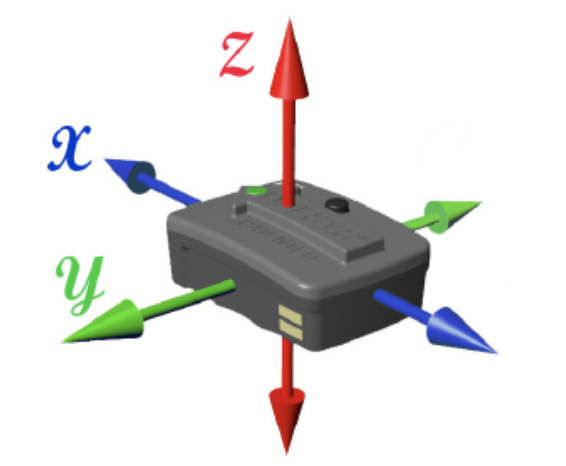

In [ ]:
# GastrocAccX=statistics.mean(GastrocAccX[0],GastrocAccX[1],GastrocAccX[2],GastrocAccX[3])
GastrocAccX=np.mean( np.array([ GastrocAccX[0], GastrocAccX[1],GastrocAccX[2],GastrocAccX[3] ]), axis=0 )
GastrocAccY=np.mean( np.array([ GastrocAccY[0], GastrocAccY[1],GastrocAccY[2],GastrocAccY[3] ]), axis=0 )
GastrocAccZ=np.mean( np.array([ GastrocAccZ[0], GastrocAccZ[1],GastrocAccZ[2],GastrocAccZ[3] ]), axis=0 )

RFAccX=np.mean( np.array([ RFAccX[0], RFAccX[1],RFAccX[2],RFAccX[3] ]), axis=0 )
RFAccY=np.mean( np.array([ RFAccY[0], RFAccY[1],RFAccY[2],RFAccY[3] ]), axis=0 )
RFAccZ=np.mean( np.array([ RFAccZ[0], RFAccZ[1],RFAccZ[2],RFAccZ[3] ]), axis=0 )

BFAccX=np.mean( np.array([ BFAccX[0], BFAccX[1],BFAccX[2],BFAccX[3] ]), axis=0 )
BFAccY=np.mean( np.array([ BFAccY[0], BFAccY[1],BFAccY[2],BFAccY[3] ]), axis=0 )
BFAccZ=np.mean( np.array([ BFAccZ[0], BFAccZ[1],BFAccZ[2],BFAccZ[3] ]), axis=0 )


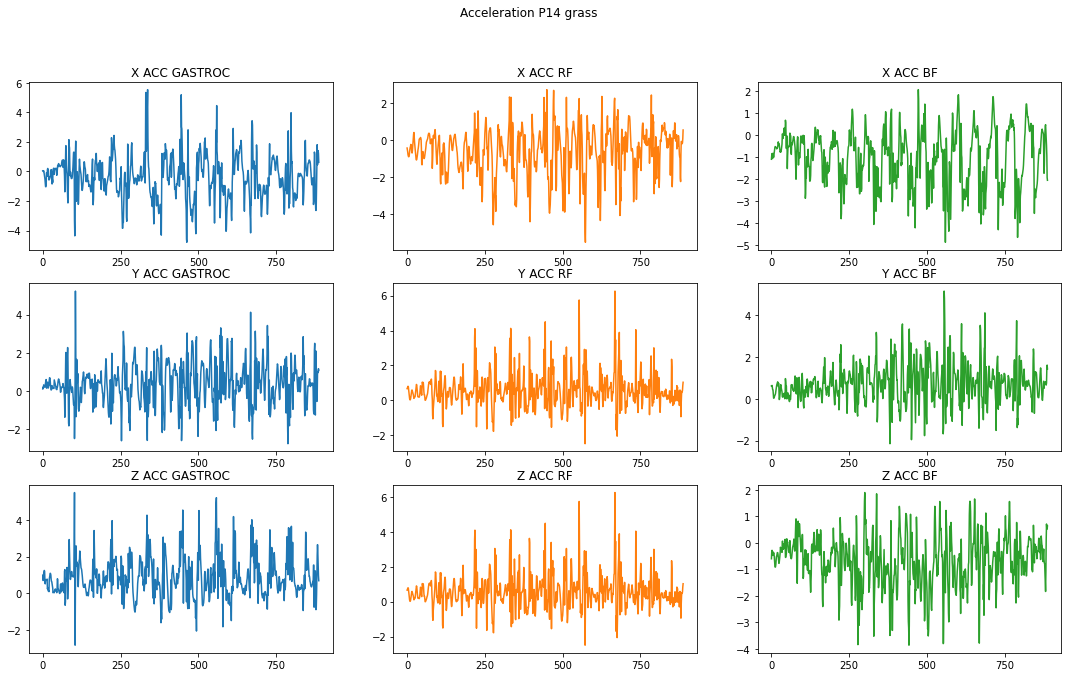

In [ ]:
#determine which muscle and acceleration axis to use for gait cycle identification
fig, ((ax1, ax2, ax3), (ax11, ax22, ax33),(ax111, ax222, ax333)) = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Acceleration P14 grass')

ax1.plot(GastrocAccX)
ax1.title.set_text('X ACC GASTROC') 
ax1.locator_params(axis='x', nbins=4) 
ax2.plot(RFAccX, 'tab:orange')
ax2.title.set_text('X ACC RF') 
ax2.locator_params(axis='x', nbins=4) 
ax3.plot(BFAccX, 'tab:green')
ax3.title.set_text('X ACC BF') 
ax3.locator_params(axis='x', nbins=4) 

ax11.plot(GastrocAccY)
ax11.title.set_text('Y ACC GASTROC') 
ax11.locator_params(axis='x', nbins=4) 
ax22.plot(RFAccY, 'tab:orange')
ax22.title.set_text('Y ACC RF') 
ax22.locator_params(axis='x', nbins=4) 
ax33.plot(BFAccY, 'tab:green')
ax33.title.set_text('Y ACC BF') 
ax33.locator_params(axis='x', nbins=4) 

ax111.plot(GastrocAccZ)
ax111.title.set_text('Z ACC GASTROC') 
ax111.locator_params(axis='x', nbins=4) 
ax222.plot(RFAccY, 'tab:orange')
ax222.title.set_text('Z ACC RF') 
ax222.locator_params(axis='x', nbins=4) 
ax333.plot(BFAccZ, 'tab:green')
ax333.title.set_text('Z ACC BF') 
ax333.locator_params(axis='x', nbins=4) 


In [ ]:
#load EMG data
T1_14_asphalt_EMG=pd.read_excel('/content/exported-14/P14_2asphalt1.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T") 
T2_14_asphalt_EMG=pd.read_excel('/content/exported-14/P14_2asphalt5.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")
T3_14_asphalt_EMG=pd.read_excel('/content/exported-14/P14_3asphalt19.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")
T4_14_asphalt_EMG=pd.read_excel('/content/exported-14/P14_asphalt26.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")

T1_14_grass_EMG=pd.read_excel('/content/exported-14/P14_2grass5.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")
T2_14_grass_EMG=pd.read_excel('/content/exported-14/P14_3grass13.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")
T3_14_grass_EMG=pd.read_excel('/content/exported-14/P14_3grass5.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")
T4_14_grass_EMG=pd.read_excel('/content/exported-14/P14_grass16.xlsx',sheet_name='Sheet1',  usecols = "A,B,D,L,T")

In [ ]:
# save EMg data
T1_14_asphalt_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1_14_asphalt_EMG.pickle',T1_14_asphalt_EMG)
T2_14_asphalt_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T2_14_asphalt_EMG.pickle',T2_14_asphalt_EMG)
T3_14_asphalt_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3_14_asphalt_EMG.pickle',T3_14_asphalt_EMG)
T4_14_asphalt_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T4_14_asphalt_EMG.pickle',T4_14_asphalt_EMG)

T1_14_grass_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1_14_grass_EMG.pickle',T1_14_grass_EMG)
T2_14_grass_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T2_14_grass_EMG.pickle',T2_14_grass_EMG)
T3_14_grass_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3_14_grass_EMG.pickle',T3_14_grass_EMG)
T4_14_grass_EMG=save_pickle('/content/drive/MyDrive/Gab/Variables_saved/T4_14_grass_EMG.pickle',T4_14_grass_EMG)

In [ ]:
T1_14_asphalt_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1_14_asphalt_EMG.pickle')
T2_14_asphalt_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T2_14_asphalt_EMG.pickle')
T3_14_asphalt_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3_14_asphalt_EMG.pickle')
T4_14_asphalt_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T4_14_asphalt_EMG.pickle')

T1_14_grass_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T1_14_grass_EMG.pickle')
T2_14_grass_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T2_14_grass_EMG.pickle')
T3_14_grass_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T3_14_grass_EMG.pickle')
T4_14_grass_EMG= open_pickle('/content/drive/MyDrive/Gab/Variables_saved/T4_14_grass_EMG.pickle')

In [ ]:
#downsample EMG data from 1926 to 148
def _resample_fft(signal, desired_length):
    resampled_signal = scipy.signal.resample(signal, desired_length)
    return resampled_signal

def resample_emg(signal):
    desired_sampling_rate=148
    sampling_rate=1926

    desired_length = int(np.round(len(signal) * desired_sampling_rate / sampling_rate))
    resampled = _resample_fft(signal, desired_length)
    return resampled 

#call resemple function 
T1Gastroc_a_EMG_resampled=resample_emg(T1_14_asphalt_EMG.iloc[:,2])
T2Gastroc_a_EMG_resampled=resample_emg(T2_14_asphalt_EMG.iloc[:,2])
T3Gastroc_a_EMG_resampled=resample_emg(T3_14_asphalt_EMG.iloc[:,2])
T4Gastroc_a_EMG_resampled=resample_emg(T4_14_asphalt_EMG.iloc[:,2])

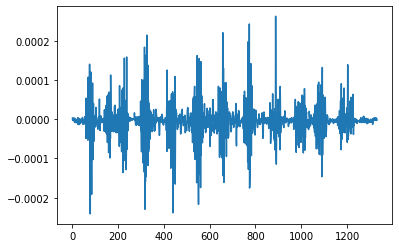

In [ ]:
plt.plot(T1Gastroc_a_EMG_resampled)

In [ ]:
def cut_trials_emg(Trial):
  Window=148*3
  t=Trial#RF Y
  dimensions= np.max(np.nonzero(t)) #index of last non-zero value
  Middle=int(dimensions/2)
  T_cut =t[Middle-Window:Middle+Window]
  return T_cut 

In [ ]:
# cut the selectect muscle/axis for comparison
T1_14a_Gastroc_cut=cut_trials_emg(T1Gastroc_a_EMG_resampled)
T2_14a_Gastroc_cut=cut_trials_emg(T2Gastroc_a_EMG_resampled) 
T3_14a_Gastroc_cut=cut_trials_emg(T3Gastroc_a_EMG_resampled)
T4_14a_Gastroc_cut=cut_trials_emg(T4Gastroc_a_EMG_resampled)

# Average 
Gastroc_EMG=np.mean( np.array([ T1_14a_Gastroc_cut, T2_14a_Gastroc_cut,T3_14a_Gastroc_cut,T4_14a_Gastroc_cut ]), axis=0 )

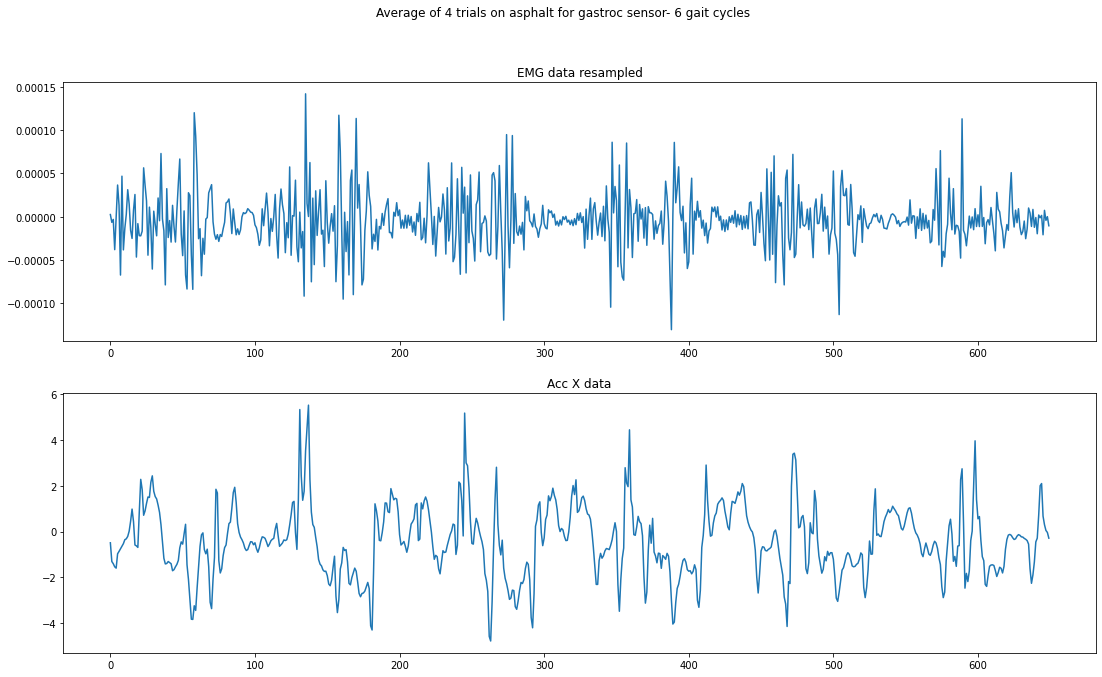

In [ ]:
fig, ((EMG, Acc)) = plt.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Average of 4 trials on asphalt for gastroc sensor- 6 gait cycles')
EMG.plot(Gastroc_EMG[200:850])
EMG.title.set_text('EMG data resampled') 
Acc.plot(GastrocAccX[200:850])
Acc.title.set_text('Acc X data') 

In [ ]:
#identify gait cycle (end and begining)---Based on acc data but applied on EMG data
GC1=Gastroc_EMG[20:120]
GC2=Gastroc_EMG[121:221]
GC3=Gastroc_EMG[242:342]
GC4=Gastroc_EMG[350:450]
GC5=Gastroc_EMG[460:560]
GC6=Gastroc_EMG[550:650]


#average signal for 10 gait cycle

# list of positive integer numbers
GC_6 = [GC1, GC2, GC3, GC4, GC5, GC6]
#Average 
GC_6_mean=np.mean( np.array([ GC1,GC2,GC3,GC4,GC5,GC6 ]), axis=0 )
len(GC_6_mean)

100

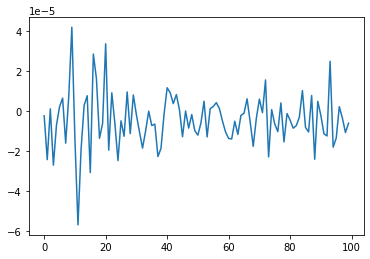

In [ ]:
plt.plot(GC_6_mean)

In [ ]:
# De-mean data
GC_6_dm = GC_6_mean - statistics.mean(GC_6_mean)

# Full-wave rectification
GC_6_FWR=abs(GC_6_dm)

In [ ]:
from scipy import signal
# Linear Envelope
def filteremg(emg, Fs=148, high_band=2, low_band=50):
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(Fs/2)
    low_band = low_band/(Fs/2)
    
    # create bandpass filter for EMG
    b1, a1 = signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filt = signal.filtfilt(b1, a1, emg)

    return emg_filt

GC_6_filt=filteremg(emg=GC_6_FWR, Fs=148, high_band=2, low_band=50)

# create lowpass filter and apply to rectified signal to get EMG envelope
sfreq=148
low_pass=5
low_pass = low_pass/(sfreq/2)
b2, a2 = scipy.signal.butter(4, low_pass, btype='lowpass')
emg_envelope = scipy.signal.filtfilt(b2, a2, GC_6_FWR)

In [ ]:
# Integrated EMG from the LE EMG
#integrate over the full duration of the signal
# integrate over 100 ms long bins
# Fs = 148  # data was sampled at 1926 Hz
# T = 1/Fs   # sampling period
# bin = int(0.1/T)
# L = len(GC_6_mean)

# Int_EMG6= pd.DataFrame()
# for i in range(1,L-bin+1,bin):
#     exEMG_Ibin= sum(GC_6_FWR[i:i+bin-1])*T
#     Int_EMG6=Int_EMG6.append(exEMG_Ibin)
    
# Int_EMG6

# # Average EMG over the full duration of the signal
# L = len(GC_6_mean)
# GC_6_Afull = GC_6_Ifull / (L*T)

# # Root Mean Square
# import math 
# rms = math.sqrt(sum(GC_6_dm * GC_6_dm) / len(GC_6_dm))

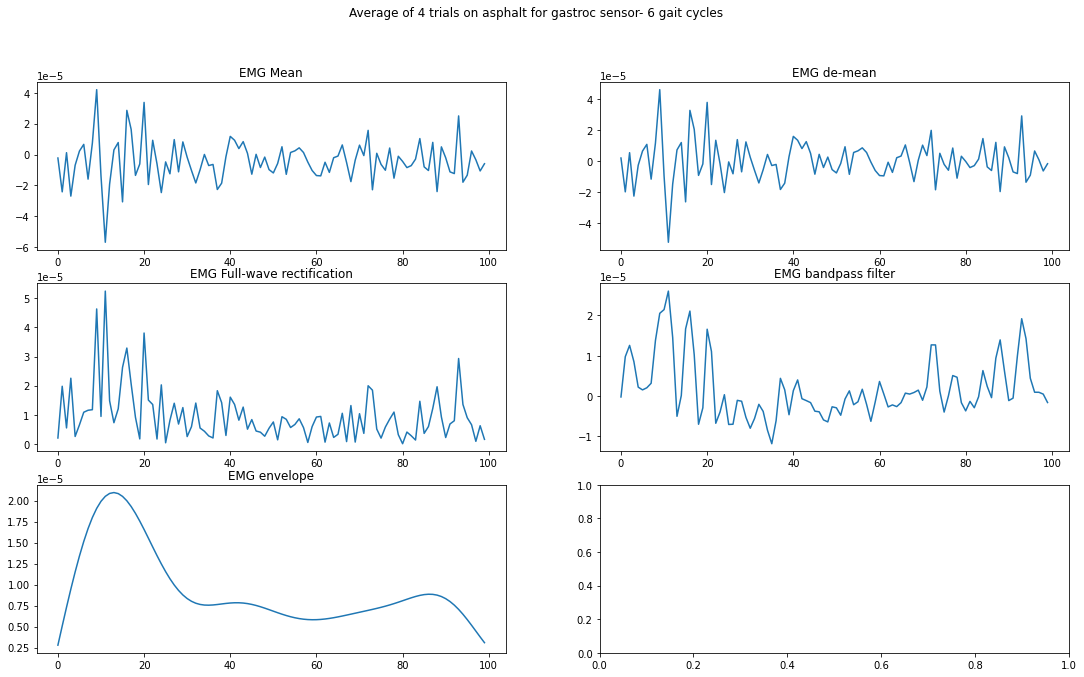

In [ ]:
fig, ((EMG1, EMG2),(EMG3,EMG4),(EMG5,EMG6)) = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Average of 4 trials on asphalt for gastroc sensor- 6 gait cycles')

EMG1.plot(GC_6_mean)
EMG1.title.set_text('EMG Mean') 
EMG2.plot(GC_6_dm)
EMG2.title.set_text('EMG de-mean') 

EMG3.plot(GC_6_FWR)
EMG3.title.set_text('EMG Full-wave rectification') 
EMG4.plot(GC_6_filt)
EMG4.title.set_text('EMG bandpass filter') 

EMG5.plot(emg_envelope)
EMG5.title.set_text('EMG envelope') 


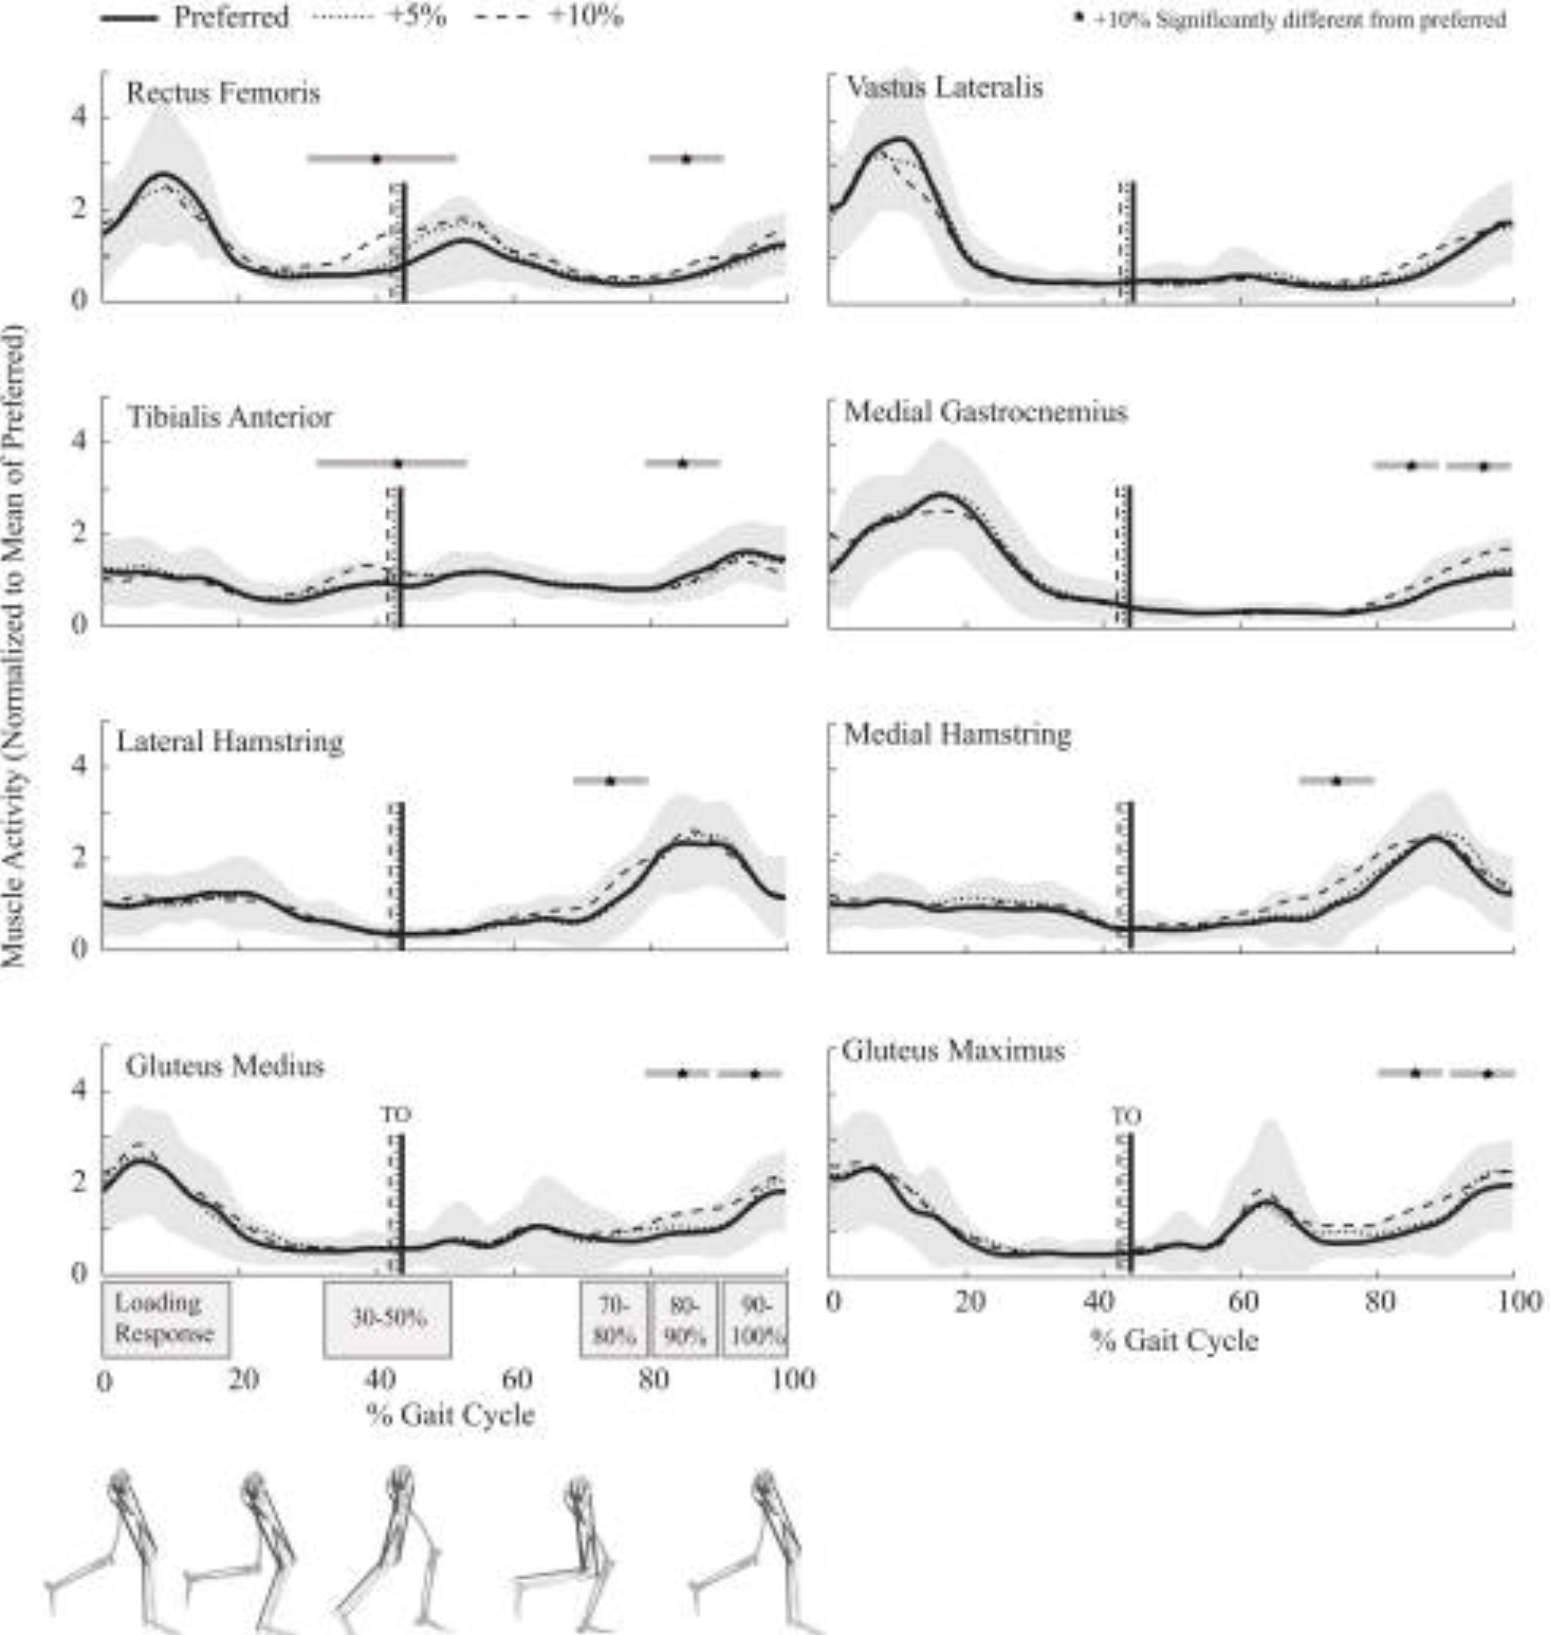